
### Simple Linear Regression

* [Assumptions](https://rpubs.com/sngere/1077102)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import seaborn as sns
import session_info

[Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)




In [13]:
df = pd.read_csv("FuelConsumption.csv")
df.head(1)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196


In [14]:
cdf = df[['CO2EMISSIONS','ENGINESIZE']]

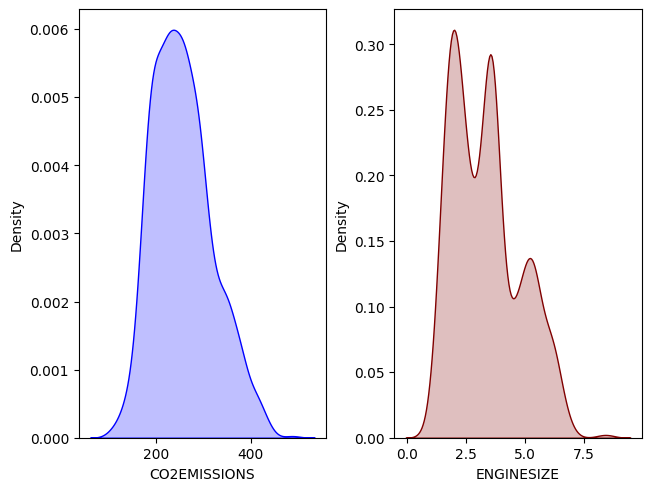

In [15]:
axd = plt.figure(constrained_layout=True).subplot_mosaic(
    """
    AB
    """
)
sns.kdeplot(data=cdf, x='ENGINESIZE', fill=True, color='maroon', ax=axd['B'])
sns.kdeplot(data=cdf, x='CO2EMISSIONS', fill=True, color='blue', ax=axd['A'])
plt.show()

#### Split train and test dataset

In [16]:
X = cdf[['ENGINESIZE']] # U[[ ]] ensures that you're creating a DataFrame with the appropriate shape.
y = cdf['CO2EMISSIONS']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Train model
[Non-negative least squares](https://scikit-learn.org/stable/modules/linear_model.html)


In [18]:
regressor = LinearRegression(positive=True) 
regressor.fit(X_train, y_train)

LinearRegression(positive=True)

In [19]:
print ('Coefficients: ', regressor.coef_)
print ('Intercept: ',regressor.intercept_)

Coefficients:  [39.24838431]
Intercept:  126.18920154724972


#### Evaluation

In [20]:
y_pred = regressor.predict(X_test)

meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared/coefficient of determination: {:.2f}'.format(regressor.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared/coefficient of determination: 76.37
Mean Absolute Error: 25.568890456023563
Mean Square Error: 1181.5288093035547
Root Mean Square Error: 34.373373551392284


#### Plot

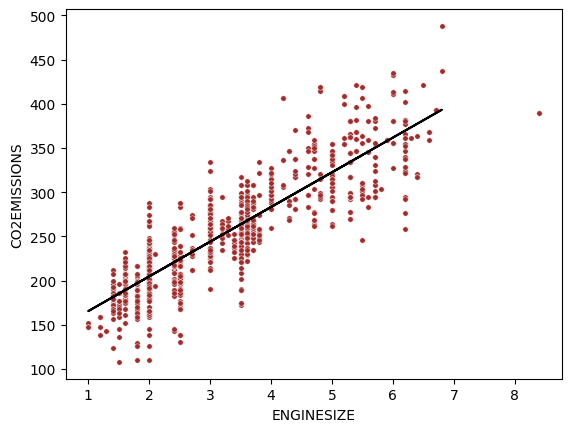

In [21]:
sns.scatterplot(x=cdf['ENGINESIZE'], y=cdf['CO2EMISSIONS'], s=15, color='brown')
plt.plot(X_test, y_pred,color='k')

Predict

In [22]:
print(regressor.predict([[6.9]]))

[397.0030533]


c:\Users\samng\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
session_info.show()